# Simulated Annealing in 2D function

In [54]:
# objective function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def objective(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.exp(1) + 20


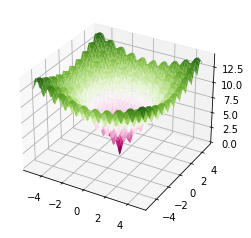

In [7]:
# show the objectie fucntion
r_min, r_max=-5.0, 5.0
xaxis=np.arange(r_min,r_max,0.1)
yaxis=np.arange(r_min,r_max,0.1)
#create 2D mesh
x, y=np.meshgrid(xaxis, yaxis)
#compute results
results=objective(x,y)
#plot the objective function
figure=plt.figure()
axis=figure.gca(projection='3d')
axis.plot_surface(x,y,results, cmap='PiYG')
plt.show()

## define the algorithm here

In [44]:
def simulated_annealing_2D(objective,bounds,n_iterations,stepsize,temp):
    # generate the initial step
    best_x, best_y=bounds[0][0]+ np.random.rand()*(bounds[0][1]-bounds[0][0]),bounds[1][0]+ np.random.rand()*(bounds[1][1]-bounds[1][0])
    #calculate the value
    best_eval=objective(best_x,best_y)
    #current solution
    curr_x,curr_y,curr_eval= best_x, best_y, best_eval
    # do iteraction
    scores=[]
    for i in range(n_iterations):
        #genereate a next step
        candidate_x= curr_x +np.random.randn()*stepsize
        candidate_y= curr_y +np.random.randn()*stepsize
        candidate_eval=objective(candidate_x, candidate_y)
        #algorith to decide if the move is taken
        if candidate_eval < best_eval:
            #store new best point
            best_x, best_y, best_eval = candidate_x, candidate_y,candidate_eval
            scores.append(best_eval)
            # report progress
            print('>%d f(%s,%s)=%.5f'%(i, best_x, best_y,best_eval))
        #calculate the energy difference
        diff=candidate_eval-curr_eval
        
        # calculate the metropolis temperature
        t=temp/float(i+1)
        #calculate metroplolis acceptance criteria
        metropolis =np.exp(-diff/t)
        # if lower energy the move is taken
        # decide if the move is taken based on metropolis criteria 
        if diff<0 or np.random.rand()<metropolis:
            curr_x, curr_y, curr_eval= candidate_x,candidate_y,candidate_eval
    return [best_x,best_y,best_eval,scores]
    
    

>6 f(-3.0821616300244403,2.3309743750363383)=9.92803
>7 f(-2.9585461120824212,2.36595225678249)=9.85141
>10 f(-2.883560524332523,2.3508017841857822)=9.82156
>12 f(-2.7964266260835244,2.269506701475017)=9.61410
>14 f(-2.817753082356445,2.2317710238100408)=9.38679
>15 f(-2.494882748484047,2.1110275043088036)=9.23022
>17 f(-2.5996205853800616,2.0774670187843878)=9.18851
>18 f(-2.6836659540412526,2.089229384496468)=9.10732
>21 f(-2.8177911602964527,2.0519713738440357)=8.52777
>23 f(-2.955237297205468,2.000182956059272)=7.97868
>25 f(-2.96433100409151,1.9588883028011421)=7.97742
>113 f(-3.0494965695066667,1.098180241265758)=7.65187
>114 f(-2.879212356646566,1.0511090925914588)=7.44318
>115 f(-2.926495496365504,1.0439548245144623)=7.29886
>136 f(-2.9161387225375903,0.9881014963729866)=7.24213
>212 f(-2.1320680082266983,0.5767683259315115)=7.18397
>221 f(-2.217233163486497,0.27803630979019134)=7.12268
>224 f(-2.0111264596729552,0.4427874287979583)=6.74016
>225 f(-1.9094129254295134,0.47660383

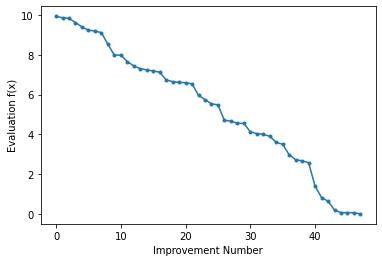

In [55]:
n_iterations=2000
step_size=0.1
temp=500
bounds=[[r_min, r_max], [r_min, r_max]]
#peform the simulated annealing search
best_x,best_y,score,scores = simulated_annealing_2D(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s %s)=%f'%(best_x,best_y,score))
#line plot of best scores
plt.plot(scores,'.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()

## Clearly, we need way higher temperature to overcome local minimun in 2D
also It is likely an inefficent algorithm

In the following, we will try the dual_annealing function from scipy

In [51]:
bounds

[[-5.0, 5.0], [-5.0, 5.0]]

In [56]:
from scipy.optimize import dual_annealing

def objective(v):
    x, y= v
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.exp(1) + 20



result = dual_annealing(objective, bounds)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))


Status : ['Maximum number of iteration reached']
Total Evaluations: 4298
Solution: f([-9.32659019e-10  6.33219834e-10]) = 0.00000
